In [1]:
import json
import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize 
#nltk.download('wordnet')
from nltk.corpus import wordnet #wornet loaded
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
#import re


def get_hypernym(syns):
    hypernymList = []
    paths = wordnet.synset(syns).hypernym_paths() #all Hypernym extract
    for weg in paths:
        hypernymList = hypernymList + [synset.name() for synset in weg]
   # print(hypernymList)
    hypernymList = list(dict.fromkeys(hypernymList )) #remove duplicate
    return hypernymList
def get_directhypernym(syns):
    hypernymList = [hyp.name() for hyp in  wordnet.synset(syns).hypernyms()]
    return hypernymList

In [2]:
get_directhypernym("wheeled_vehicle.n.01")


['container.n.01', 'vehicle.n.01']

In [3]:
def get_synsetsList(ideen):
    synsetsDict  = {}
    for idee in ideen_list:  #jeder idee durchlaufen
        annotiert = idee.get("annotations")
        if annotiert :
            for candidate in idee['annotations']: #word in eine idee  
                if candidate['validated'] == True: #wenn diese word annotiert ist
                    for resources in candidate['resource_candidates']: #annotation candidates durchlaufen
                        if resources["selected"] == True: #wenn ein kandidates ausgewählt ist
                            if not synsetsDict.get(resources["source"]): #wenn diese synsets noch nicht existiert
                                synsetsDict[resources["source"]] = []  # fügt diese synsets in synsetList
                                synsetsDict[resources["source"]].append(idee['id']) #fügt die idee_id die diese synset beinhaltet
                            else:
                                synsetsDict[resources["source"]].append(idee['id']) #idee_id einfügen           
                    #print(synsets)
                else:
                    print("not choice")
        else:
            print("candidate was not annotiert")
    return synsetsDict
def get_hypernymDict(ideen_list,synsetsDict):
    hypernymDict = {}
    #for idee in ideen_list:  #jeder idee durchlaufen 
    for key in synsetsDict.keys(): #hypernym von jeder synsets builden
            hypernymList = get_hypernym(key)
            for hypernym in hypernymList:
                if not hypernymDict.get(hypernym): #wenn das Hypernym noch nicht existiert
                    hypernymDict[hypernym]= []
                    hypernymDict[hypernym].extend(synsetsDict[key]) #alle idee_id in der zugehörigen hypernym einfügen
                    #get_hypernym(key)
                #break
                else: #sonst fügt die idee id nur
                    hypernymDict[hypernym].extend(synsetsDict[key])
                hypernymDict[hypernym] = list(dict.fromkeys(hypernymDict[hypernym] )) #remove duplicate
                    
    return hypernymDict
                
    
   

In [4]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
# graphviz needs to be installed for the next line!
#DotExporter(udo).to_picture("udo.png")
import sys

#print('test')
def get_key(key,dictionaryTree):
    found = []
    for a in (i for i in dictionaryTree.values()):
    #for key in dictionaryTree.keys():
        if key in a:
            #print(key,a)
            found = [j for j, value in dictionaryTree.items() if value == a]
    return found
def build_dictionary(dictionary_actual):
    for element in dictionary_actual.copy():
        #print(element)
        if element == "entity.n.01":
            pass
        else:
            hypernymList = get_directhypernym(element)
            if not hypernymList:
                dictionary_actual["entity.n.01"] = []
                dictionary_actual["entity.n.01"].append(element)
            else:
                for hypernym in hypernymList:
                   # found = get_key(hypernym)
                    if hypernym in dictionary_actual.keys():
                        dictionary_actual[hypernym].append(element)
                    else:
                        dictionary_actual[hypernym] = []
                        dictionary_actual[hypernym].append(element)
        
    return dictionary_actual
    
def analyse(synsetsDict):
    #f = open(filename,'w')
    dictionaryTree = {}
    dictionary_actual = {} #contains new Hypernym which is not in dictionaryTree
    #distance_matrix = 
    for syns in synsetsDict.keys(): #hypernym von jeder synsets builden
        if syns == "entity.n.01":
            dictionaryTree["entity.n.01"] = []
            dictionary_actual["entity.n.01"] = []
        else:
            hypernymList = get_directhypernym(syns)
            for hypernym in hypernymList:
                dictionaryTree[hypernym] = []
                dictionaryTree[hypernym].append(syns)
                dictionary_actual[hypernym] = []
                dictionary_actual[hypernym].append(syns)
    while(len(dictionary_actual) != 0):
        dictionary_actual = build_dictionary(dictionary_actual)
        for elem in dictionary_actual.copy():
            if elem in dictionaryTree.keys():
                dictionaryTree[elem].extend(dictionary_actual.pop(elem))
                dictionaryTree[elem] = list(dict.fromkeys(dictionaryTree[elem])) #remove duplicate
            else:
                dictionaryTree[elem] = []
                dictionaryTree[elem] = dictionary_actual[elem]            
    return dictionaryTree
        #treeset(syns,dictionaryTree)
    #for key in dictionaryTree.keys():
           # a = key+".png"
           # DotExporter(b).to_picture(a)

In [5]:
def build_tree(dictionaryTree):
    i=0
    for elem in dictionaryTree:
        #print (elem)
        a    = elem+".png"
        #https://stackoverflow.com/questions/6181935/how-do-you-create-different-variable-names-while-in-a-loop
        globals()['var_%s' % i] = Node(elem, children = [Node(i) for i in dictionaryTree[elem]]) #dynamic variable name create
        #globals()['string%s' % x] = 'Hello'
        i=i+1
      
    for value in dictionaryTree.values():
        for elem in value:
            if elem in dictionaryTree.keys():
                key   = get_key(elem,dictionaryTree)
                
                index_key = list(dictionaryTree.keys()).index(key[0])
                index_elem = list(dictionaryTree.keys()).index(elem)
                name_key = "var" + str(index_key)
                name_elem = 'var'+ str(index_elem)
                #print(index_key,index_elem)
                #globals()['var_%s' % index_key].children = globals()['var_%s' % index_elem].children
                globals()['var_%s' % index_elem].parent = globals()['var_%s' % index_key]
    return DotExporter(var_26).to_picture("entity.png")
    #print(list(dictionaryTree.keys()).index("entity.n.01"))
    #print(RenderTree(var_12))
    '''
    print(RenderTree(var_11))
    print(RenderTree(var_10))
    print(RenderTree(var_9))
    print(RenderTree(var_8))
    print(RenderTree(var_7))
    print(RenderTree(var_6))
    print(RenderTree(var_5))
    print(RenderTree(var_4))
    print(RenderTree(var_3))
    print(RenderTree(var_2))
    print(RenderTree(var_1))
    print(RenderTree(var_0))
    '''
    
    #return 0
    
    

In [6]:
def add_leaves(dictionary):
    for elem in dictionary.copy().values():
        for i in elem :
            if i not in dictionary.keys():
                dictionary[i] = []
    return dictionary

In [51]:
#Balkendiagramm
#https://bodo-schoenfeld.de/jupyter-notebook-balkendiagramm-erstellen/
def plot_balken(hypernymdict):
    fig, ax = plt.subplots()
    hypernymlist = list(hypernymdict.keys())
    anteile = [len(i) for i in hypernymdict.values()]
    index = np.arange(len(hypernymlist))
    bars = plt.bar(index, anteile,color="green")
    plt.xticks(index, hypernymList)
    plt.title("Anzahl von Ideen pro Hypernym")
    plt.ylabel('Anzahl von Ideen')
    plt.xlabel("Hypernymm")
    ax.set_xticks(range(len(hypernymlist)))
    ax.set_xticklabels(hypernymlist, rotation='vertical')
    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 5 #Set a zoom factor
    plt.gcf().set_size_inches(sizefactor * fig_size) # Modify the current size by the factor
    #print(fig_size)
    plt.savefig('anzahl.png')
    plt.show()
    #plt.savefig('anzahl.png')
    #print(anzahl)
    #print(hypernymdict)


candidate was not annotiert
candidate was not annotiert
candidate was not annotiert
candidate was not annotiert
candidate was not annotiert
candidate was not annotiert


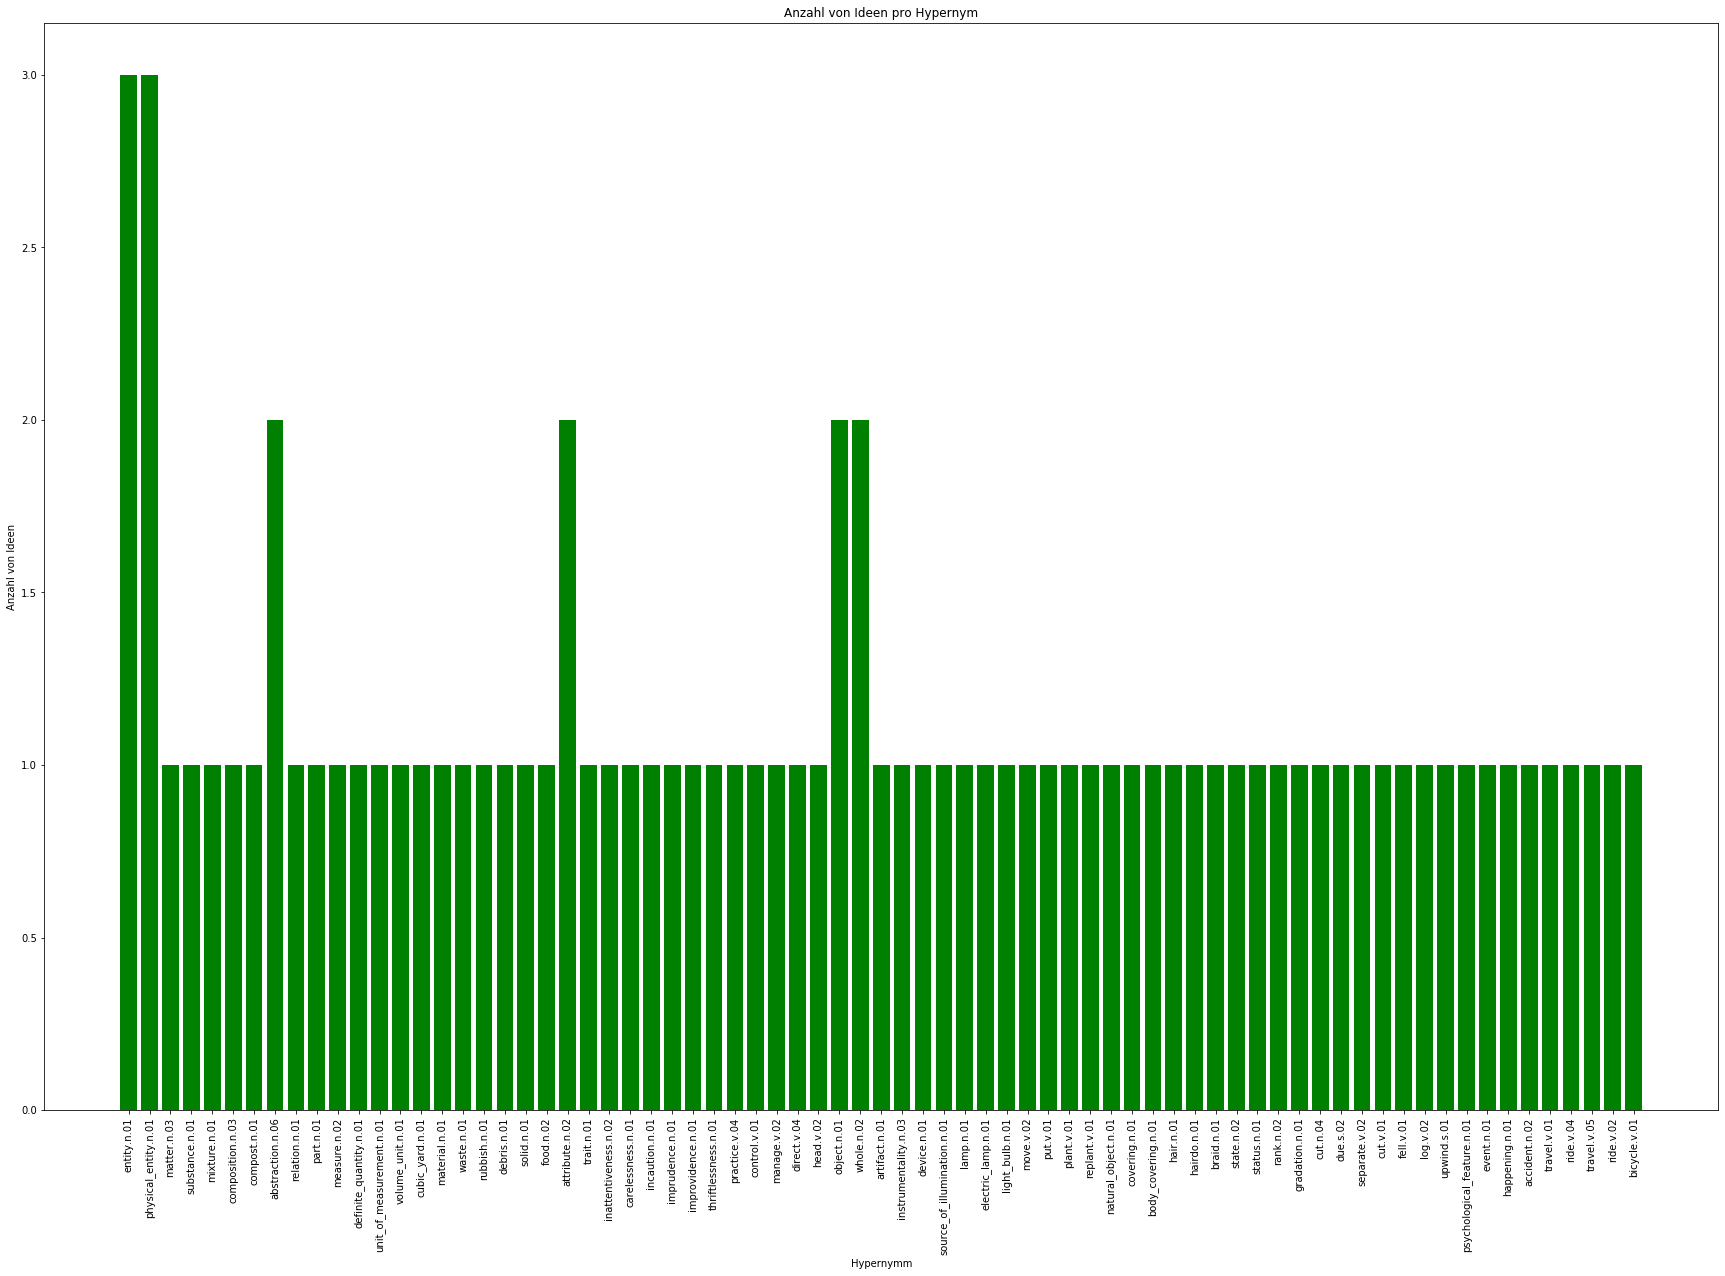

<Figure size 432x288 with 0 Axes>

In [53]:
# read file
if __name__ == '__main__':
    #dictionaryTree = {}
    with open('export.json', 'r') as myfile:
        data = myfile.read()
# parse file
    ideen_list   = json.loads(data)
    synsetsList  = get_synsetsList(ideen_list)
    hypernymList = get_hypernymDict(ideen_list,synsetsList)
    plot_balken(hypernymList)
    
    #synsetsList = {'compact.n.03':[], 'truck.n.01':[]}
    #for idee in ideen_list:
        #for id in hypernymList['physical_entity.n.01']:
            #if idee['id'] == id:
                #print(idee['content'])
    #print(list(synsetsList.keys()) == list(['compact.n.03','truck.n.02']))
    #dictionaryTree = analyse(synsetsList)
    #build_tree(dictionaryTree)
    #print(json.dumps(dictionaryTree))
    #dictionaryTree = add_leaves(dictionaryTree)
    

In [ ]:
#%debug

In [14]:
#print(json.dumps(dictionaryTree))
#a = 0

import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage, is_valid_linkage
import pandas as pd
import numpy as np

# Load required modules
#https://stackoverflow.com/questions/35490371/how-to-visualize-dendrogram-a-dictionary-of-hierarchical-items
#https://stackoverflow.com/questions/41659633/plotting-a-dictionary-of-hierarchical-nodes-as-a-dendrogram-using-python
# Construct the graph/hierarchy
G           = nx.DiGraph(dictionaryTree)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]
#print("G:", G)
#print("nodes:", nodes)
print("leaves:", leaves)
#print("inner_nodes", inner_nodes)
# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )


for u in inner_nodes:
    children = set()
    node_list = list(dictionaryTree[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += dictionaryTree[v]

    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes     ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = dictionaryTree[n]
    x = children[0]
    for y in children[1:]:
        #z = tuple(subtree[x] + subtree[y])
        z = tuple(sorted(subtree[x] + subtree[y]))
        i, j = index[tuple(subtree[x])], index[tuple(subtree[y])]
        Z.append([i, j, float(len(subtree[n])), len(z)]) # <-- float is   required by the dendrogram function
        #print 'Z', Z
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1
#print(Z)

# Visualize
print(is_valid_linkage(Z))
#dendrogram(Z, labels=leaves)

#plt.show()

#metric = 'hamming'
#M = np.loadtxt("z_bug_matrix.txt")
#Z = linkage(M, method='average', metric='hamming')

y = np.array([0] * len(leaves))
print(Z)

 

leaves: {'log.v.02', 'bicycle.v.01', 'cut.n.04', 'braid.n.01', 'accident.n.02', 'thriftlessness.n.01', 'food.n.02', 'ride.v.04', 'head.v.02', 'light_bulb.n.01', 'cubic_yard.n.01', 'compost.n.01', 'replant.v.01', 'debris.n.01'}
False
[[12, 1, 2.0, 2], [3, 6, 2.0, 2], [11, 10, 2.0, 2], [5, 13, 2.0, 2], [2, 9, 2.0, 2], [7, 15, 3.0, 3], [19, 18, 5.0, 5], [0, 4, 6.0, 2], [21, 15, 6.0, 4], [22, 17, 6.0, 6], [14, 16, 10.0, 4], [24, 23, 10.0, 10]]


In [ ]:
from anytree.importer import JsonImporter
dictA = '''{"a": "root","children": [{"a": "sub0","children": [{"a": "sub0A","b": "foo"},{"a": "sub0B"}]},{"a": "sub1"}]}'''
importer = JsonImporter()
root = importer.import_(dictA)
DotExporter(root,nodenamefunc=lambda n: n.a).to_picture("root.png")
#for line in DotExporter(root, nodenamefunc=lambda n: n.id()):
#    print(line)
#print(RenderTree(root))

In [ ]:

#else:
           # hypernym.child = b         
        #dictionaryTree[hypernym] = []
        #dictionaryTree[hypernym].append(syns)
       # hypernym = Node(hypernym,child = syns)
    # if element in testlist:
    #print testlist.index(element)
   # b = syns 
    #b = Node(syns)
     #hypernym.child = b
       # elif hypernym in (dictionaryTree[key] for key in dictionaryTree.key()):
        #elif not found:
#from plotly.figure_factory import create_dendrogram
#import numpy as np
#import pandas as pd
#from . import hierarchy
#import scipy
#import scipy.spatial
#from scipy.cluster import hierarchy
#from scipy.cluster.hierarchy import dendrogram, linkage
#from plotly.figure_factory import create_dendrogram
#import scipy.cluster.hierarchy as sch
#import scipy.spatial as scs
#
#from scipy import hierarchy
    
#Index = ['A','B','C','D','E','F','G','H','I','J']
#df    = pd.DataFrame(abs(np.random.randn(10, 10)), index=Index)
#fig   = create_dendrogram(df, labels=Index)
#fig.show()

#for key in hypernymList.keys():
    #print(len(hypernymList[key]))

#print(hypernymList['entity.n.01'])

#Dendrogramm
#class Node(list):
  #  def __init__(self, parent=None):
 #       self.parent = parent
    
 #   def append(self, node):
 #       if isinstance(node, Node):
  #          if node.parent == None:
 #               node.parent = self
  #          list.append(self, node)


#c1 = Node()
#c2 = Node()
#root.append(c1)
#root.append(c2)

#c2.append( Node() )



In [ ]:
 from anytree import NodeMixin, RenderTree
class MyBaseClass(object):  # Just an example of a base class
    foo = 4
class MyClass(MyBaseClass, NodeMixin):
    def __init__(self, name, length, width, parent=None, children=None):
         super(MyClass, self).__init__()
         self.name = name
         self.length = length
         self.width = width
         self.parent = parent
         if children:
            self.children = children

my0 = MyClass('my0', 0, 0)
my1 = MyClass('my1', 2, 0, parent=my0)
my2 = MyClass('my2', 1, 0, parent=my0)
my3 = MyClass('my3', 2, 0, parent=my2)
print(DotExporter(my0,indent = 10).to_picture("my0.png"))


In [ ]:
# Load required modules
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Construct the graph/hierarchy
d           = { 0: [1, 'd'], 1: ['a', 'b', 'c'], 'a': [], 'b': [], 'c': [], 'd': []}
G           = nx.DiGraph(d)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
#print(subtree)
for u in inner_nodes:
    children = set()
    node_list = list(d[u])
    print(children)
    
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += d[v]
        print(node_list)

    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = d[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(subtree[x] + subtree[y])
        i, j = index[tuple(subtree[x])], index[tuple(subtree[y])]
        Z.append([i, j, float(len(subtree[n])), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# Visualize
dendrogram(Z, labels=leaves)
plt.show()
print(Z)
print("G:", G)
print("nodes:", nodes)
print("leaves:", leaves)
print("inner_nodes", inner_nodes)